<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cоотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Изучение-сетевого-распространения--видов-объектов-общественного-питания" data-toc-modified-id="Изучение-сетевого-распространения--видов-объектов-общественного-питания-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучение сетевого распространения  видов объектов общественного питания</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест-в-зависимости-от-размера-сети" data-toc-modified-id="Распределение-количества-посадочных-мест-в-зависимости-от-размера-сети-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение количества посадочных мест в зависимости от размера сети</a></span></li><li><span><a href="#Среднее-количество-мест-для-каждого-вида-заведений." data-toc-modified-id="Среднее-количество-мест-для-каждого-вида-заведений.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Среднее количество мест для каждого вида заведений.</a></span></li><li><span><a href="#Добавление-столбца-с-названием-улиц" data-toc-modified-id="Добавление-столбца-с-названием-улиц-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление столбца с названием улиц</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a></span></li><li><span><a href="#Улицы-с-одним-объектом-питания" data-toc-modified-id="Улицы-с-одним-объектом-питания-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Улицы с одним объектом питания</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Рынок заведений общественного питания Москвы

**Описание исследования:**
Для оценки долгосрочной прибыльности проекта по открытию кафе с роботами-официантами, необходимо оценить текущее положение на рынке общепита. Сформулировать критерии успешности заведений, понять, соответствует ли проект данным критериям. 
Для анализа будут использованы открытые данные обо всех заведениях в Москве.


**План исследования:**
1) Загрузим данные и проведем предобработку;
<br>
2) Проведем анализ данных;
<br>
3) Подготовим и оформим презентацию.

**Описание данных:**<br>
Таблица rest_data:<br>
id — идентификатор объекта;<br>
object_name — название объекта общественного питания;<br>
chain — сетевой ресторан;<br>
object_type — тип объекта общественного питания;<br>
address — адрес;<br>
number — количество посадочных мест.<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from io import BytesIO
import requests

## Предобработка данных

Загрузим таблицу и взглянем на первые несколько строк.

In [3]:
data = pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Переведем значения в столбцах 'object_name', 'address' в нижний регистр. 

In [5]:
data[['object_name', 'address']] = data[['object_name', 'address']].apply(lambda x: x.str.lower())

Проверим столбцы 'chain' и 'object_type' на неявные дубликаты.

In [6]:
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [7]:
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Проверим данные на наличие явных дубликатов.

In [8]:
data.duplicated().sum()

0

Но что будет, если исключить из таблицы столбец id, значение которого уникально для каждой строки и проверить на наличие дубликатов снова.

In [9]:
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

85

85 явных дубликатов. Избавимся от них.

In [10]:
data = data.loc[~data['id'].isin(data[data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]['id'])]

Еще несколько смущает, что наименования заведений представлены в разных форматах. В каких-то случаях это просто название, например, Родник, в каких-то случаях могут быть названия вроде Кафе «Академия». Здесь могут быть неявные дубликаты, которые помешают дальнейшему исследованию. Выведем данные, например, по сети KFC.

In [11]:
data[data['object_name'].str.contains('kfc')]

,id,object_name,chain,object_type,address,number
142,26142,kfc,да,ресторан,"город москва, бутырская улица, дом 89",67
301,24242,kfc,да,ресторан,"город москва, улица грузинский вал, дом 28/45",40
339,72728,kfc,да,ресторан,"город москва, дубнинская улица, дом 30, корпус 1",70
726,69804,kfc,да,предприятие быстрого обслуживания,"город москва, можайское шоссе, дом 39",98
853,143264,kfc,да,предприятие быстрого обслуживания,"город москва, 9-я парковая улица, дом 30",44
...,...,...,...,...,...,...
15243,205439,kfc,да,предприятие быстрого обслуживания,"город москва, улица ленинская слобода, дом 26,...",30
15244,210743,kfc,да,предприятие быстрого обслуживания,"город москва, город московский, улица хабарова...",0
15245,205607,kfc,да,предприятие быстрого обслуживания,"город москва, поселение московский, киевское ш...",30
15246,214867,kfc,да,кафе,"город москва, кутузовский проспект, дом 57",0


Вот так да. Здесь KFC относится и к ресторану, и ПБО и кафе. А если, например, возьмем сеть кафе Андерсон.

In [12]:
data[data['object_name'].str.contains('андерсон')]

,id,object_name,chain,object_type,address,number
151,155973,кафе «андерсон»,да,кафе,"город москва, варшавское шоссе, дом 2",150
524,144114,андерсон,да,кафе,"город москва, кусковская улица, дом 47",42
1007,21864,андерсон,да,кафе,"город москва, гагаринский переулок, дом 6",26
1097,141695,андерсон,да,кафе,"город москва, стартовая улица, дом 9, корпус 2",46
1100,22046,андерсон,да,кафе,"город москва, страстной бульвар, дом 4, строен...",20
1643,27146,андерсон,да,ресторан,"город москва, долгоруковская улица, дом 6",74
1692,21697,детское кафе «андерсон»,да,кафе,"город москва, улица островитянова, дом 5",45
1724,142967,кафе «андерсон»,да,кафе,"город москва, мичуринский проспект, дом 7, кор...",98
1793,21696,детский клуб «андерсон»,да,кафе,"город москва, улица островитянова, дом 9, корп...",41
2439,69286,кафе «андерсон»,да,кафе,"город москва, город зеленоград, площадь юности...",190


Стало еще печальнее. Здесь проблемы и с названием, и с типом.

Сначала займемся названиями. Выведем весь список и выявим типичные проблемы.

In [13]:
data['object_name'] = data['object_name'].apply(lambda x: x.replace('кафе ', '')
                                               .replace('ресторан ', '')
                                                .replace('бар ', '')
                                                .replace('кофейня ', '')
                                                .replace('пиццерия ', '')
                                                .replace('предприятие быстрого обслуживания ', '')
                                                .replace('закусочная ', '')
                                                .replace('«', '')
                                                .replace('»', '')                                              
                                               )

По типу заведений поправим данные хотя бы для самых крупных сетей.

In [14]:
chains = data[data['chain'] == 'да'].groupby('object_name').agg({'id': 'count'}).reset_index().rename(columns= {'id': 'amount'})
chains[chains['amount'] > 15]

,object_name,amount
9,cofix,25
25,kfc,175
46,starbucks,32
52,subway,37
79,андерсон,25
107,бургер кинг,151
160,додо пицца,54
162,домино'с пицца,98
175,иль патио,31
203,кофе с собой,44


Сначала исправим ошибки в столбце 'chain'. Если в количество точек больше двух, это уже можно считать сетью.

In [15]:
for elem in chains[chains['amount'] >= 2]['object_name']:
    data.loc[data['object_name'] == elem, 'chain'] = 'да'

Не придумал другого способа, чтобы вручную исправить проблемы в столбце 'object_type' для самых крупных сетей. Не идеально, конечно, но имеем что имеем. Для каждого наименования выведем список и проставим в столбце 'object_type' то значение, которое преобладает над остальными, в некоторых случаях будем руководствоваться здравым смыслом.

In [16]:
data.loc[data['object_name'] == 'сабвей', 'object_name'] = 'subway'
data.loc[data['object_name'] == 'старбакс', 'object_name'] = 'starbucks'
data.loc[data['object_name'] == 'cofix', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'kfc', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'starbucks', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'subway', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'андерсон', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'бургер кинг', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'додо пицца', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'домино\'с пицца', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'иль патио', 'object_type'] = 'ресторан'
data.loc[data['object_name'] == 'кофе с собой', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'кофе хаус', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'кофемания', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'крошка картошка', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'кружка', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'кулинарная лавка братьев караваевых', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'макдоналдс', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'милти', 'object_type'] = 'магазин (отдел кулинарии)'
data.loc[data['object_name'] == 'му-му', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'мята lounge', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'папа джонс', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'пицца паоло', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'пицца хат', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'прайм стар', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'суши wok', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'сушишоп', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'тануки', 'object_type'] = 'ресторан'
data.loc[data['object_name'] == 'теремок', 'object_type'] = 'предприятие быстрого обслуживания'
data.loc[data['object_name'] == 'хинкальная', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'хлеб насущный', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'чайхона №1', 'object_type'] = 'ресторан'
data.loc[data['object_name'] == 'шоколадница', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'штолле', 'object_type'] = 'кафе'
data.loc[data['object_name'] == 'якитория', 'object_type'] = 'ресторан'

Устранили часть проблем. Данные можно считать готовыми к анализу.

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

Исследуем соотношение видов объектов общественного питания по количеству и построим график.

In [17]:
# Создаем таблицу с подсчетом количества заведений по типу
count_types = data.groupby('object_type').agg({'id': 'count'}).reset_index()\
                           .rename(columns= {'id': 'amount'})\
                           .sort_values(by='amount', ascending=False)
count_types

,object_type,amount
3,кафе,5894
8,столовая,2583
6,предприятие быстрого обслуживания,2252
7,ресторан,2178
0,бар,841
1,буфет,567
4,кафетерий,364
2,закусочная,310
5,магазин (отдел кулинарии),292


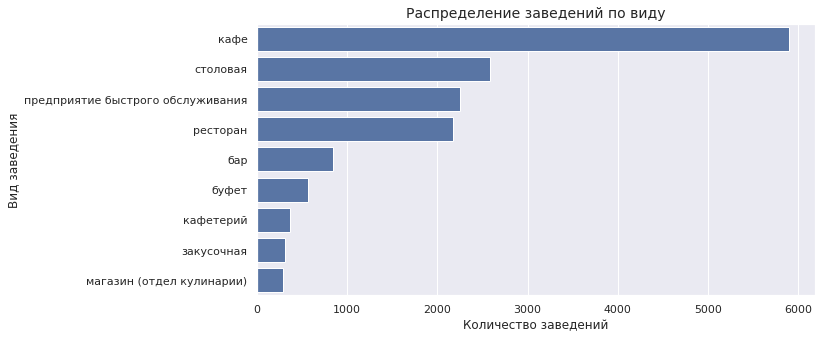

In [18]:
plt.figure(
    figsize=(10, 5)
) 
sns.set_theme(style="darkgrid")
sns.barplot(x='amount', y='object_type', data=count_types, label="Total", color='b')
plt.title('Распределение заведений по виду', fontsize=14)
plt.ylabel('Вид заведения')
plt.xlabel('Количество заведений')
plt.show()

В Москве больше всего кафе. Следом идут столовые, ПБО и рестораны. Сочетается с представлением о Москве, как о городе с высоким ритмом жизни и относительно высокой долей граждан со среднем уровнем дохода. 

### Cоотношение сетевых и несетевых заведений по количеству

Исследуем соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [19]:
count_chain = data.groupby('chain').agg({'id': 'count'}).reset_index()\
                           .rename(columns= {'id': 'amount'})\
                           .sort_values(by='amount', ascending=False)

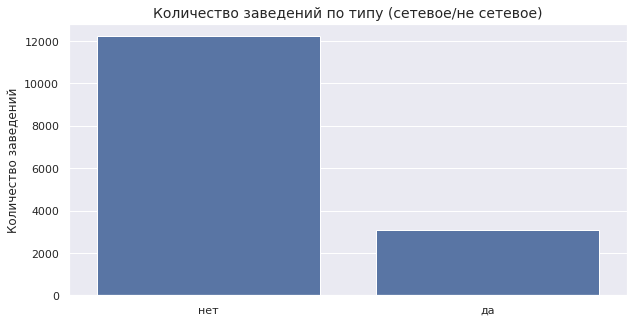

In [20]:
plt.figure(
    figsize=(10, 5)
) 
sns.set_theme(style="darkgrid")
sns.barplot(x='chain', y='amount', data=count_chain, label="Total", color='b')
plt.title('Количество заведений по типу (сетевое/не сетевое)', fontsize=14)
plt.ylabel('Количество заведений')
plt.xlabel('')
plt.show()

Несетевых заведений в 4 раза больше, чем несетевых.

### Изучение сетевого распространения  видов объектов общественного питания

Построим сводную таблицу по соотношению коичества сетевых и несетевых заведений в зависимости от типа и на его основе построим график.

In [21]:
types = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique')\
                        .reset_index().sort_values(by='нет', ascending=False)
types

chain,object_type,да,нет
3,кафе,1291,4603
8,столовая,3,2580
7,ресторан,458,1720
6,предприятие быстрого обслуживания,1150,1102
0,бар,27,814
1,буфет,2,565
4,кафетерий,21,343
2,закусочная,19,291
5,магазин (отдел кулинарии),98,194


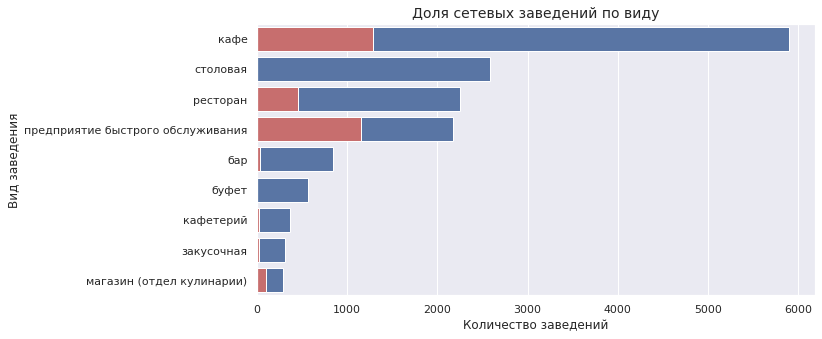

In [22]:
plt.figure(
    figsize=(10, 5)
) 
sns.set_theme(style="darkgrid")
sns.barplot(x='amount', y='object_type', data=count_types, color='b')

plt.title('Доля сетевых заведений по виду', fontsize=14);
plt.ylabel('Вид заведения')
plt.xlabel('Количество заведений')

sns.set_color_codes("muted")
sns.barplot(x="да", y="object_type", data=types,
             color="r")
plt.ylabel('Вид заведения')
plt.xlabel('Количество заведений')
plt.show()

Среди всех видов предприятий общественного питания чаще всего сетевыми являются предприятия быстрого обслуживания. Это ожидаемо, достаточно вспомнить сколько Макдоналдс было в Москве (до недавнего времени). 

Кафе также имеют относительно высокую долю сетевых заведений. 

### Распределение количества посадочных мест в зависимости от размера сети

Построим сводную таблицу, в которой посчитаем размер для каждой сети и среднее количество посадочных мест в них.

In [23]:
data_pivot_by_name = data[data['chain'] == 'да'].pivot_table(index='object_name', values=['id', 'number']
                                                , aggfunc={'id': 'nunique', 'number': 'mean'}).reset_index()\
                                                .rename(columns= {'id': 'amount'})

Далее построим диаграмму рассеяния для сетей, у которых количество заведений больше трех.

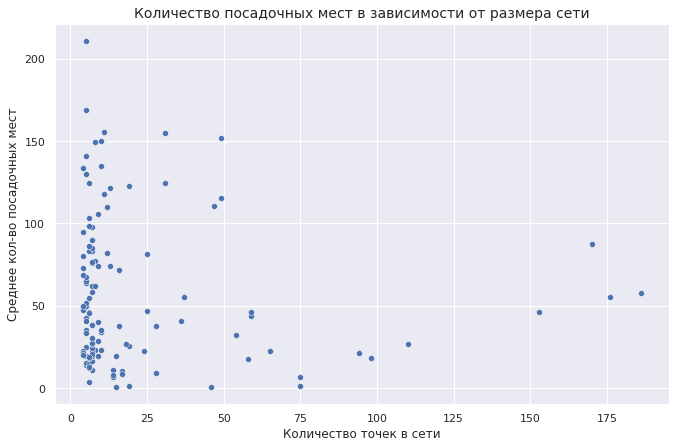

In [24]:
plt.figure(
    figsize=(11,7)
) 
sns.scatterplot(x='amount', y='number', data=data_pivot_by_name[data_pivot_by_name['amount'] > 3])
plt.title('Количество посадочных мест в зависимости от размера сети', fontsize=14)
plt.ylabel('Среднее кол-во посадочных мест')
plt.xlabel('Количество точек в сети')
plt.show()

Однозначный вывод сделать сложно. Видим, что небольшие сети (до 20 точек) имеют разное среднее количество посадочных мест - от совсем небольших до крупных точек со 100 посадочными местами и более. Крупные сети как правило имеют меньшее количество посадочных мест - около 50, но есть и исключения.

### Среднее количество мест для каждого вида заведений.

In [25]:
data_pivot_by_type = data.pivot_table(index='object_type', values='number'
                                                , aggfunc={'number': 'median'}).reset_index()\
                                                .rename(columns= {'number': 'amount'})\
                                                .sort_values(by='amount', ascending=False)
data_pivot_by_type

,object_type,amount
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,32
6,предприятие быстрого обслуживания,8
4,кафетерий,6
2,закусочная,0
5,магазин (отдел кулинарии),0


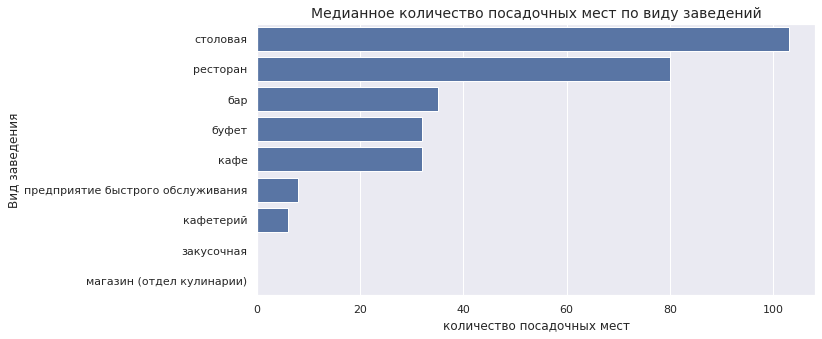

In [26]:
plt.figure(
    figsize=(10, 5)
) 
sns.set_theme(style="darkgrid")
sns.barplot(x='amount', y='object_type', data=data_pivot_by_type, label="Total", color='b')
plt.title('Медианное количество посадочных мест по виду заведений', fontsize=14)
plt.ylabel('Вид заведения')
plt.xlabel('количество посадочных мест')
plt.show()

Столовые ожидаемо заняли первое место. Для этого типа общественного питания характерно большое количество посадочных мест, так как их цель это быстро и недорого обслужить большое количество клиентов - как правило сотрудников бизнес-центров или производственные объекты. Рестораны также подразумевают большое количество мест для проведения торжеств и банкетов. 
У кафе в среднем 33-35 посадочных мест.

### Добавление столбца с названием улиц

Поступим так же, как и с удалением лишней информации в столбце с наименованием заведений. Сначала выведем весь список, просмотрим его, выявим проблемы, после чего устраним их.

In [27]:
# Избавляемся от лишних слов и символов в начале строки, а именно "город москва" и "улица"
data['street'] = data['address'].apply(lambda x: x.replace('город москва, ', '')\
                                        .replace(' улица', '')
                                       .replace('улица ', '')\
                                      )
# После избавления от начала строки замечаем, что после названия улиц в каждой строке стоит запятая. 
# Следовательно, от номеров домов можно избавиться, используя срез строки по индексу первого вхождения запятой.
data['street'] = data['street'].apply(lambda x: x[:x.index(',')])

Немного доработаем данные в этом столбце, приведем к единому формату - сначала наименование улицы, а затем ее разновидность. Например, заменим "проспект вернадского" на "вернадского проспект"

In [28]:
def change_name(street_name):
    if street_name.startswith('проспект'):
        street_name = street_name[9:] + ' проспект'
    elif street_name.startswith('проезд'):
        street_name = street_name[7:] + ' проезд'
    elif street_name.startswith('площадь'):
        street_name = street_name[9:] + ' площадь'
    elif street_name.startswith('шоссе'):
        street_name = street_name[6:] + ' шоссе'
    return street_name

In [29]:
data['street'] = data['street'].apply(change_name)

### Топ-10 улиц по количеству объектов общественного питания

Создадим сводную таблицу с подсчетом количества заведений по каждой улице и построим график для наглядности.

In [30]:
count_points_on_street = data.groupby('street').agg({'id':'count'}).reset_index()\
                        .rename(columns= {'id': 'amount'})\
                        .sort_values(by='amount', ascending=False)

# В сводную таблицу попали город зеленоград и поселение сосенское, но было посчитано общее количество заведений в этих
# населенных пунктах, поэтому исключим их, оставив только топ-10 улиц
top10_by_street = count_points_on_street.query('street != "город зеленоград" and street != "поселение сосенское"').head(10)
top10_by_street

,street,amount
1093,мира проспект,203
1411,профсоюзная,182
941,ленинградский проспект,172
1390,пресненская набережная,167
503,варшавское шоссе,162
945,ленинский проспект,148
518,вернадского проспект,128
927,кутузовский проспект,114
812,каширское шоссе,111
821,кировоградская,108


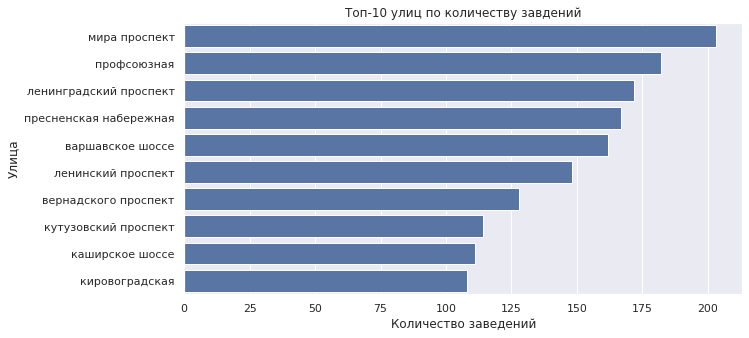

In [31]:
plt.figure(
    figsize=(10, 5)
) 
sns.set_theme(style="darkgrid")
sns.barplot(x='amount', y='street', data=top10_by_street, color='b')
plt.title('Топ-10 улиц по количеству завдений')
plt.ylabel('Улица')
plt.xlabel('Количество заведений')
plt.show()

Не знаю, что дает нам эта информация. Предположение, что количество заведений прямо пропорционально длине улицы. По этой причине у нас в топе шоссе и проспекты, которые находятся в разных частях города. Но где конкретно находятся точки притяжения людей исходя из этой информации сказать сложно.

Для определения районов города, в которых распололагаются эти улицы, загрузим внешнюю информацию из открытых источников.

In [32]:
spreadsheet_id = '1alAfA2HHsVs1CkBh81dEjBL9XAwWt-xeyp94brb4PDE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

К счастью и здесь наименования улиц отформатированы одинаково. Сначала идет наименование улицы, затем тип в сокращенном виде. Необходимо привести его а один формат с нашей основной таблицей, чтобы потом можно было их объединять.

In [33]:
# Сначала все наименование переведем в строчный регистр
df[['район', 'улица']] = df[['район', 'улица']].apply(lambda x: x.str.lower())

In [34]:
def change_street(street):
    if street.endswith('ул.'):
        street = street[:len(street) - 4]
    elif street.endswith('пр-т'):
        street = street[:len(street) - 4] + 'проспект'
    elif street.endswith('пр.'):
        street = street[:len(street) - 3] + 'проезд'
    elif street.endswith('пер.'):
        street = street[:len(street) - 4] + 'переулок'
    elif street.endswith('пл.'):
        street = street[:len(street) - 3] + 'площадь'
    elif street.endswith('ал.'):
        street = street[:len(street) - 3] + 'аллея'
    elif street.endswith('туп.'):
        street = street[:len(street) - 4] + 'тупик'
    elif street.endswith('ш.'):
        street = street[:len(street) - 2] + 'шоссе'
    elif street.endswith('наб.'):
        street = street[:len(street) - 4] + 'набережная'
    
    return street

In [35]:
df['улица'] = df['улица'].apply(change_street)

Теперь объединим основную таблицу с таблицей по районам и посмотрим на результат.

In [36]:
top10_by_districts = top10_by_street.merge(df[['район', 'улица']], left_on='street', right_on='улица', how='left')
top10_by_districts

,street,amount,район,улица
0,мира проспект,203,алексеевский,мира проспект
1,мира проспект,203,марьина роща,мира проспект
2,мира проспект,203,мещанский,мира проспект
3,мира проспект,203,останкинский,мира проспект
4,мира проспект,203,ростокино,мира проспект
5,мира проспект,203,свиблово,мира проспект
6,мира проспект,203,ярославский,мира проспект
7,профсоюзная,182,академический,профсоюзная
8,профсоюзная,182,коньково,профсоюзная
9,профсоюзная,182,обручевский,профсоюзная


Посчитаем количество районов, в которых располагается каждая улица из топ-10.

In [37]:
top10_by_districts.groupby('street').agg({'район': 'count'}).reset_index().rename(columns= {'район': 'amount'})\
                                                .sort_values(by='amount').head(10)

,street,amount
8,пресненская набережная,1
4,кутузовский проспект,2
3,кировоградская,3
2,каширское шоссе,4
5,ленинградский проспект,4
1,вернадского проспект,5
9,профсоюзная,6
7,мира проспект,7
6,ленинский проспект,8
0,варшавское шоссе,9


Большинство улиц пролегают через множество районов, что, вероятно, объясняется их длиной. Но Пресненская набережная находится только в одном районе - Пресненском, при этом количество точек находится в топ-4, а Кутузовский проспект находится всего в двух районах - Дорогомилово и Фили-давыдково, при этом в топе занимает 8 место. Пожалуй, стоит присмотреться внимательнее к этим улицам, как к потенциальным точкам открытия нашего кафе.

При этом делаем допущение, что площадь районов примерно одинакова.

### Улицы с одним объектом питания

Посчитаем количество улиц с только одним объектом питания и объединим получившуюся таблицу с таблицей с районами.

In [38]:
low_amount_street = count_points_on_street[count_points_on_street['amount'] == 1]\
                    .merge(df[['район', 'улица']], left_on='street', right_on='улица', how='left')

low_amount_street.groupby('район').agg({'street': 'count'}).reset_index().rename(columns= {'street': 'amount'})\
                                                .sort_values(by='amount', ascending=False).head(10)

,район,amount
79,троицкий,34
51,новомосковский,33
5,басманный,25
76,таганский,25
82,хамовники,25
2,арбат,18
61,пресненский,18
22,замоскворечье,14
42,мещанский,14
40,марьина роща,13


Троицкий и Новомосковский район это районы Новой Москвы, находятся далеко от центра. С другой стороны, в топе у нас оказались районы Арбат, Замоскворечье и прочие, которые не только находятся в центре, но и являются местами притяжения отдыхающих граждан. Вероятно это объясняется тем, что в этих районах множество совсем коротких улиц, на которых действительно может располагаться только 1 заведение. Но отбрасывать их сразу нельзя.

## Общий вывод

В результате проведенного исследования было выявлено, что из всех видов общественного питания в Москве самое популярное - кафе. 
В целом сетевые заведения достаточно распространены в большей степени среди ПБО и кафе.
Из примерно 6000 кафе примерно 1300 точек являются сетевыми.
Среднее количество посадочных мест для кафе - около 33-35.
Что касается местоположения - из имеющихся данных можно сделать вывод, что точками притяжения являются район Пресненский, Дорогомилово и Фили-Давыдково. Здесь располагается большое количество точек общественном питания на единицу площади.  Можно рассматривать эти районы как потенциально подходящие для открытия кафе, но не стоит забывать и про другие варианты, а также  ориентироваться на проходящий трафик, стоимость аренды, наличие свободных площадей и другие факторы.

Если говорить о прогнозе успешности кафе, то концепция кафе с роботами может обеспечить приток клиентов на первое время, так как является уникальной для города, однако успешность кафе и развития сети будет зависеть от качества питания и соответствию ценовой политики ожиданию потенциальных клиентов. Если мы рассматриваем для запуска такие районы как Пресненский или Дорогомилово, то в качестве первой точки можно открыть кафе с 33-35 посадочными местами.
При этом необязательно делать цены низкими - это престижные районы с жителями, у которых доходы выше среднего. Однако, необходимо будет удовлетворить их взыскательный вкус к сервису и еде. В случае успеха первых 1-2 точек, можно рассматривать открытие сетевых точек в других частях города.

Презентация: https://drive.google.com/file/d/1raPWNQeUuUL1xpowg1ufueXNdkK5o7fn/view?usp=sharing